In [65]:
import pandas as pd 
import os
from IPython.display import Markdown
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as stats



In [3]:
os.chdir("D:\Stackerbee\AgriCrops\Cleaned Data - Copy")
# os.chdir("D:\Stackerbee\AgriCrops")

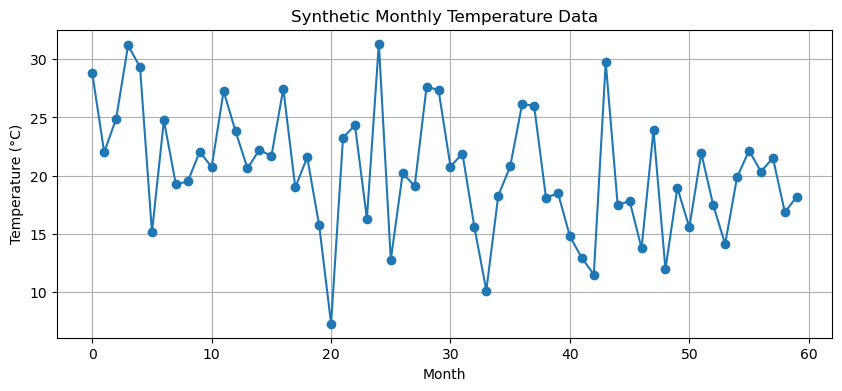

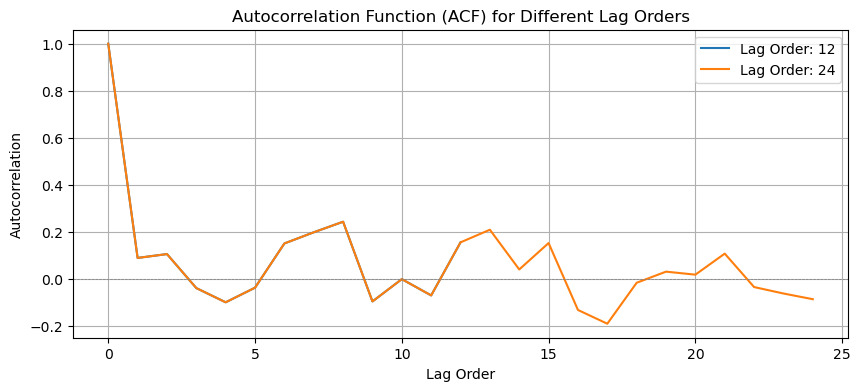

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate monthly temperature data for 5 years
np.random.seed(0)
n_months = 60
temperature = np.random.normal(loc=20, scale=5, size=n_months)

# Plot the synthetic temperature data
plt.figure(figsize=(10, 4))
plt.plot(temperature, marker='o', linestyle='-')
plt.title('Synthetic Monthly Temperature Data')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Calculate and plot the Autocorrelation Function (ACF) for different lag orders
plt.figure(figsize=(10, 4))
for lag_order in [12, 24]:
    acf = sm.tsa.acf(temperature, nlags=lag_order)
    plt.plot(range(lag_order + 1), acf, label=f'Lag Order: {lag_order}')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Autocorrelation Function (ACF) for Different Lag Orders')
plt.xlabel('Lag Order')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()


CSV file 'Green Gram Dal (Moong Dal)_cleaned_cleaned.csv' successfully loaded into DataFrame.
Data types cleaned successfully.


### DataFrame Summary Statistics

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
count,1091.000000,1092.000000,1092.000000,1092.000000
mean,9.047177,4665.341575,5737.204212,5670.685897
std,34.970986,1494.274422,1393.128916,1388.581406
min,0.100000,900.000000,900.000000,900.000000
25%,0.400000,3648.750000,4683.750000,4600.000000
50%,1.500000,4600.000000,5990.000000,5900.000000
75%,5.200000,5800.000000,6700.000000,6650.000000
max,705.070000,9000.000000,9485.000000,9160.000000


# Null Values in the Dataframe

State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            1
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64


# Visualize_distribution

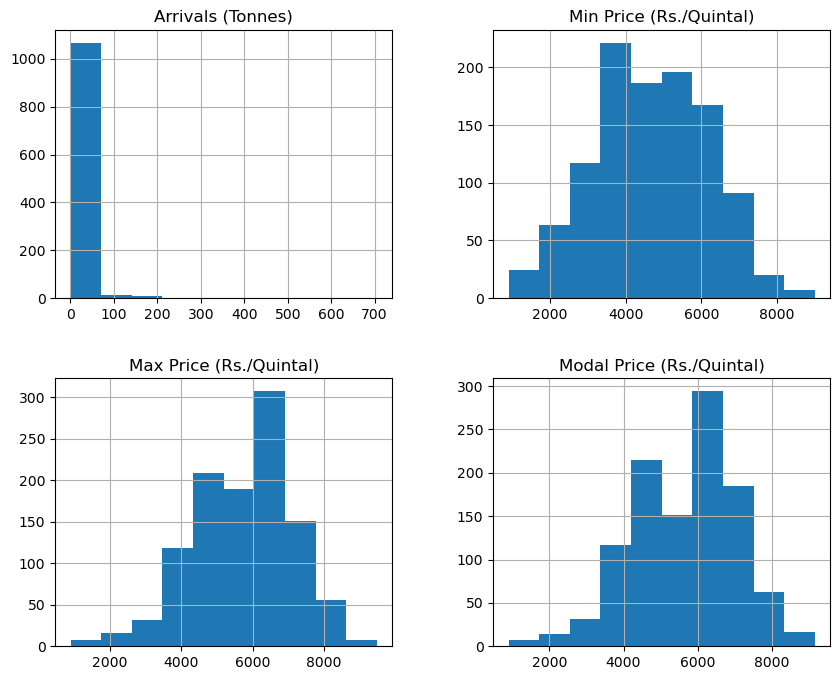

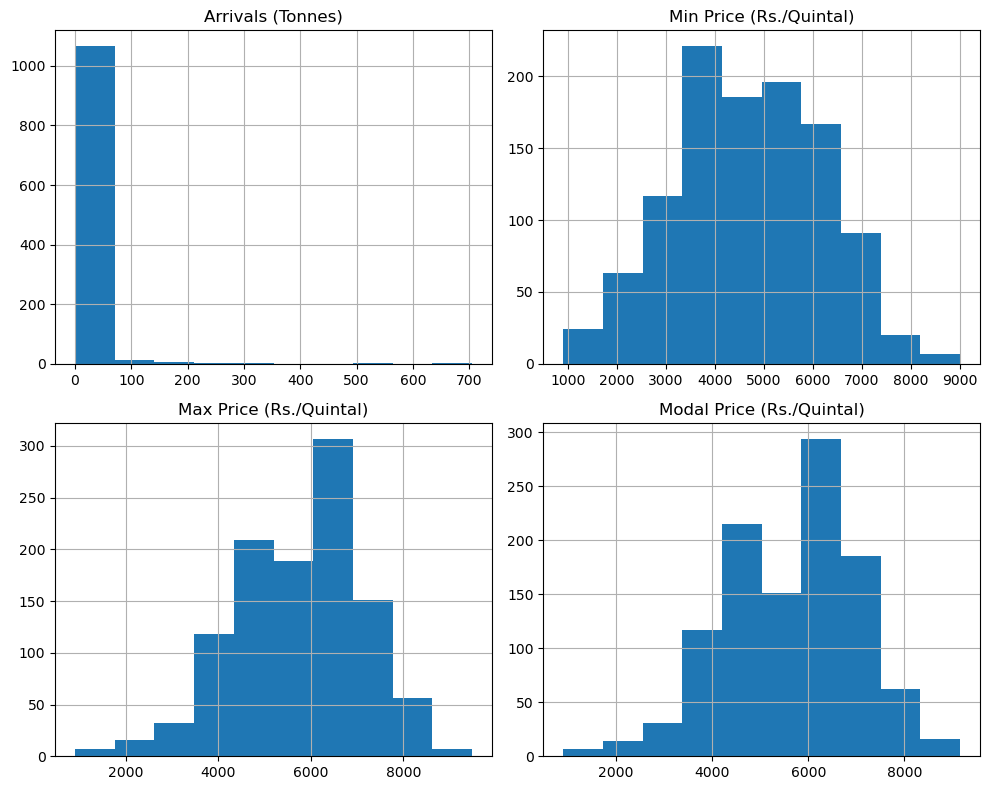

The data in column 'Arrivals (Tonnes)' does not appear to be normally distributed (p-value=0.0000)
The data in column 'Min Price (Rs./Quintal)' does not appear to be normally distributed (p-value=0.0001)
The data in column 'Max Price (Rs./Quintal)' does not appear to be normally distributed (p-value=0.0000)
The data in column 'Modal Price (Rs./Quintal)' does not appear to be normally distributed (p-value=0.0000)


# Co_realation_cofficents

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Arrivals (Tonnes),1.000000,-0.068910,-0.122918,-0.140164
Min Price (Rs./Quintal),-0.068910,1.000000,0.544391,0.565777
Max Price (Rs./Quintal),-0.122918,0.544391,1.000000,0.985976
Modal Price (Rs./Quintal),-0.140164,0.565777,0.985976,1.000000


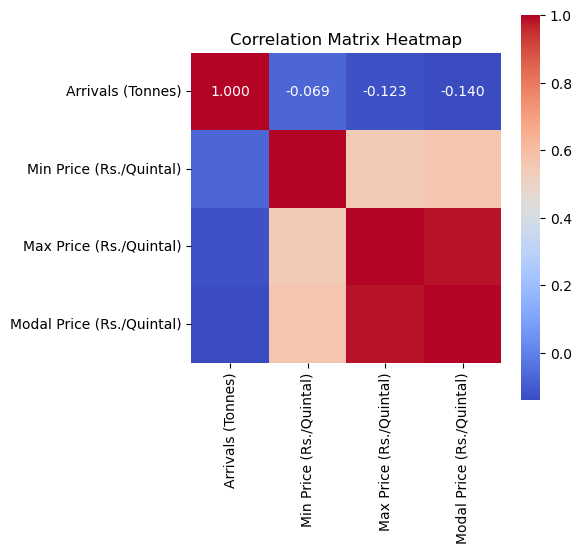

# Time Series

# Modal Price vs Year

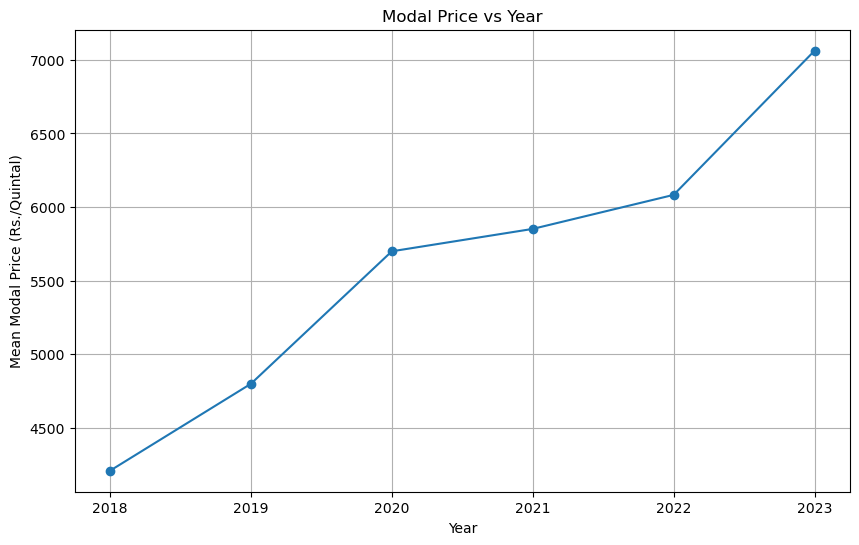

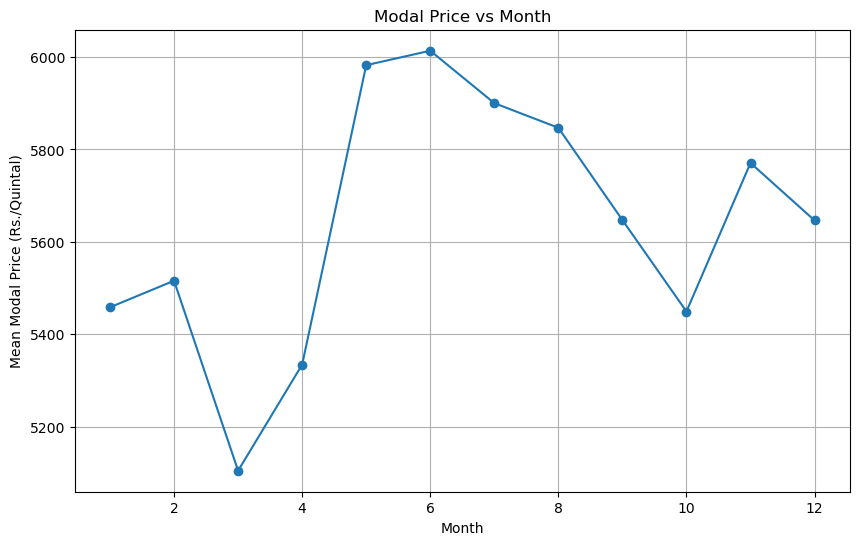

# Aggregated Data

,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
0,2018-01-31,7.5,4220.714286
1,2018-02-28,29.6,3841.642857
2,2018-03-31,5.3,4022.333333
3,2018-04-30,6.6,4674.571429
4,2018-05-31,102.8,4636.111111


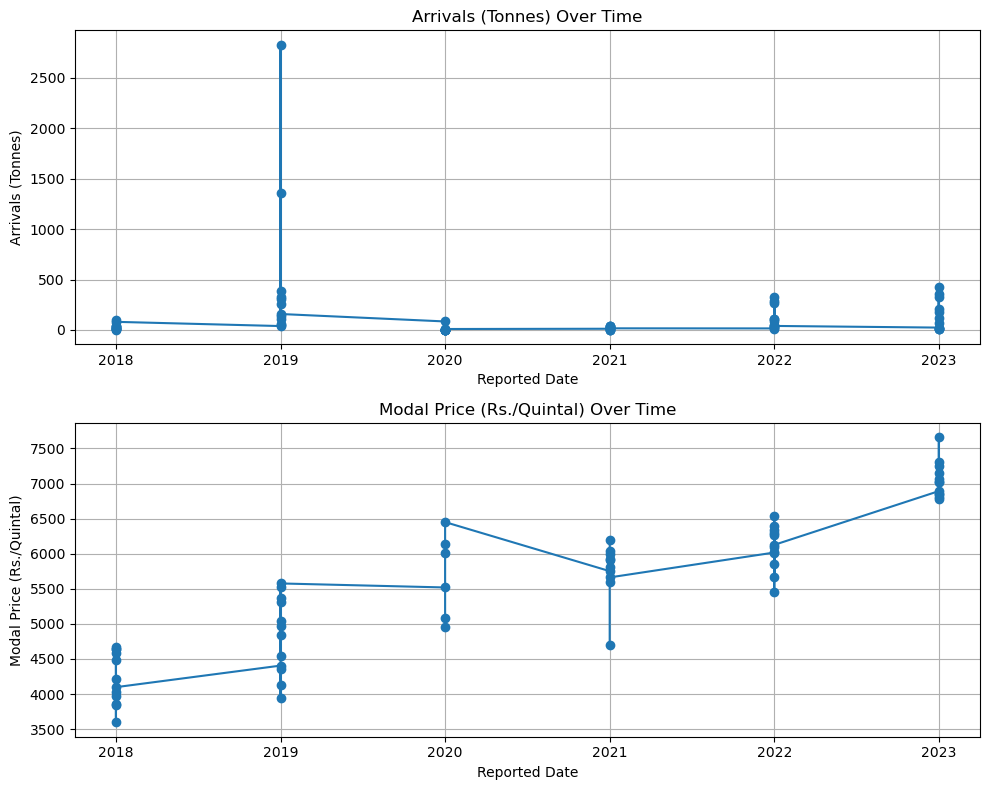

In [67]:
class CSVDataReader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data_frame = None
    
    def read_csv_to_dataframe(self):
        try:
            self.data_frame = pd.read_csv(self.file_path,parse_dates=['Reported Date'])
            # self.data_frame = pd.read_csv(self.file_path,skiprows=[0])
            print(f"CSV file '{self.file_path}' successfully loaded into DataFrame.")
        except FileNotFoundError:
            print(f"Error: CSV file '{self.file_path}' not found.")
        except Exception as e:
            print(f"An error occurred while reading CSV file: {e}")

    def display_dataframe_info(self):
        if self.data_frame is not None:
            self.data_frame['Reported Date'] =  pd.to_datetime(self.data_frame['Reported Date'], errors='coerce', format='%d-%b-%y')
            display(self.data_frame['Reported Date'])
            print("\nDataFrame Info:")
            print(self.data_frame.info())
        else:
            print("DataFrame is empty. Please load data first.")

    def missing_values(self):
        display(Markdown('# Null Values in the Dataframe'))
        if self.data_frame is not None:
            print(self.data_frame.isnull().sum())

    def clean_data_types(self):
        if self.data_frame is not None:
            
            # self.data_frame['Reported Date'] = pd.to_datetime(self.data_frame['Reported Date'], errors='coerce', format='%d-%b-%y')
            self.data_frame['Reported Date'] = pd.to_datetime(self.data_frame['Reported Date'], errors='coerce', format='%d-%b-%y')

            # self.data_frame['Arrivals (Tonnes)'] = pd.to_numeric(self.data_frame['Arrivals (Tonnes)'], errors='coerce')
            self.data_frame['Arrivals (Tonnes)'] = pd.to_numeric(self.data_frame['Arrivals (Tonnes)'], errors='coerce').astype(float)

            
            print("Data types cleaned successfully.")
        else:
            print("DataFrame is empty. Please load data first.")

    def save_dataframe_to_csv(self):
        if self.data_frame is not None:
            try:
                self.clean_data_types()
                base_path, file_extension = os.path.splitext(self.file_path)
                cleaned_file_path = f"{base_path}_cleaned{file_extension}"
                
                self.data_frame.to_csv(cleaned_file_path, index=False)
                print(f"DataFrame successfully saved to CSV file '{self.file_path}'.")
            except Exception as e:
                print(f"Error occurred while saving DataFrame to CSV file: {e}")
        else:
            print("DataFrame is empty. Please load data first.")


    def perform_analysis(self):
        if self.data_frame is not None:
            try:
                # Display Markdown with analysis results
                Markdown('# Exploratory Data Analysis')
                display(Markdown("### DataFrame Summary Statistics"))
                # display(self.data_frame.describe())
                display(self.data_frame.drop(columns=['Reported Date']).describe())
            except Exception as e:
                print(f"An error occurred during analysis: {e}")
        else:
            print("Error: No DataFrame loaded. Please load CSV file first.")

    def Visualize_distribution(self):

        numeric_columns = ['Arrivals (Tonnes)','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)']
    

        display(Markdown('# Visualize_distribution'))
        
        self.data_frame.drop(columns=['Reported Date']).hist(figsize=(10, 8))


        
       
        self.data_frame[numeric_columns].hist(figsize=(10, 8))
        plt.tight_layout()
        plt.show()
        
        # Check for normal distribution
        for column in numeric_columns:
            data = self.data_frame[column].dropna()
            _, p_value = stats.normaltest(data)
            if p_value > 0.05:
                print(f"The data in column '{column}' appears to be normally distributed (p-value={p_value:.4f})")
            else:
                print(f"The data in column '{column}' does not appear to be normally distributed (p-value={p_value:.4f})")

    def Co_realation_cofficents(self):
        display(Markdown('# Co_realation_cofficents'))
        Removing_cloumns = ['State Name','District Name','Market Name', 'Variety','Group','Reported Date']
        correlation_matrix =  self.data_frame.drop(columns=Removing_cloumns).corr()
        display(correlation_matrix)

        plt.figure(figsize=(5, 5))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", square=True)
        plt.title('Correlation Matrix Heatmap')
        plt.show()

    

    def plot_time_series(self, column):
        
        display(Markdown('# Time Series'))
        self.data_frame.set_index('Reported Date', inplace=True)
        self.data_frame['Year'] = self.data_frame.index.year
        self.data_frame['Month'] = self.data_frame.index.month
        yearly_prices = self.data_frame.groupby('Year')['Modal Price (Rs./Quintal)'].mean()
        monthley_prices = self.data_frame.groupby('Month')['Modal Price (Rs./Quintal)'].mean()
        display(Markdown('# Modal Price vs Year'))
        plt.figure(figsize=(10, 6))
        plt.plot(yearly_prices.index, yearly_prices.values, marker='o', linestyle='-')
        plt.title('Modal Price vs Year')
        plt.xlabel('Year')
        plt.ylabel('Mean Modal Price (Rs./Quintal)')
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(monthley_prices.index, monthley_prices.values, marker='o', linestyle='-')
        plt.title('Modal Price vs Month')
        plt.xlabel('Month')
        plt.ylabel('Mean Modal Price (Rs./Quintal)')
        plt.grid(True)
        plt.show()
        
    def aggregate_data(self, frequency='M', aggregation={'Arrivals (Tonnes)': 'sum', 'Modal Price (Rs./Quintal)': 'mean'}):
       
        display(Markdown('# Aggregated Data'))
    
        
        df_aggregated = self.data_frame.resample(frequency).agg(aggregation)
        
        df_aggregated.reset_index(inplace=True)

        display(df_aggregated.head())

        df_aggregated.set_index('Reported Date', inplace=True)
        
    
        

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        
        # Plot for Arrivals (Tonnes) versus Reported Date
        ax1.plot(df_aggregated.index.year, df_aggregated['Arrivals (Tonnes)'], marker='o', linestyle='-')
        ax1.set_title('Arrivals (Tonnes) Over Time')
        ax1.set_xlabel('Reported Date')
        ax1.set_ylabel('Arrivals (Tonnes)')
        ax1.grid(True)
        
        # Plot for Modal Price (Rs./Quintal) versus Reported Date
        ax2.plot(df_aggregated.index.year, df_aggregated['Modal Price (Rs./Quintal)'], marker='o', linestyle='-')
        ax2.set_title('Modal Price (Rs./Quintal) Over Time')
        ax2.set_xlabel('Reported Date')
        ax2.set_ylabel('Modal Price (Rs./Quintal)')
        ax2.grid(True)
        
        # Adjust layout and display the plots
        plt.tight_layout()
        plt.show()


    



# Example usage:
if __name__ == "__main__":
    csv_reader = CSVDataReader('Green Gram Dal (Moong Dal)_cleaned_cleaned.csv')
    
    csv_reader.read_csv_to_dataframe()
    
#     csv_reader.display_dataframe_info()

    csv_reader.clean_data_types()
    
    csv_reader.perform_analysis()

    csv_reader.missing_values()
    
    csv_reader.Visualize_distribution()
    
    csv_reader.Co_realation_cofficents()
    
    csv_reader.plot_time_series('Modal Price (Rs./Quintal)')
    
    csv_reader.aggregate_data(frequency='M', aggregation={'Arrivals (Tonnes)': 'sum', 'Modal Price (Rs./Quintal)': 'mean'})

    # display(csv_reader.data_frame)
    
    
    # csv_reader.display_dataframe_info()
    
#     csv_reader.save_dataframe_to_csv()

#     csv_reader.read_csv_to_dataframe()
    
#     csv_reader.display_dataframe_info()




